# Imports

In [2]:
import sys
sys.path.append('../src')

from data_manager import read_frame

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage import transform, feature

data_path = '../data'
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

# Data

In [3]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_df.head()

print(f"Training data {len(train_df)}")

Training data 2020


# Sample

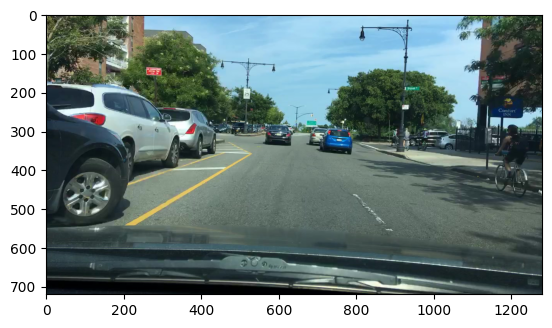

In [4]:
frame = read_frame(data_path, train_df, 0)

plt.imshow(frame)
plt.show()

# Histogram of Oriented Gradients

Frame shape: (720, 1280, 3)
HOG features shape: (509436,)


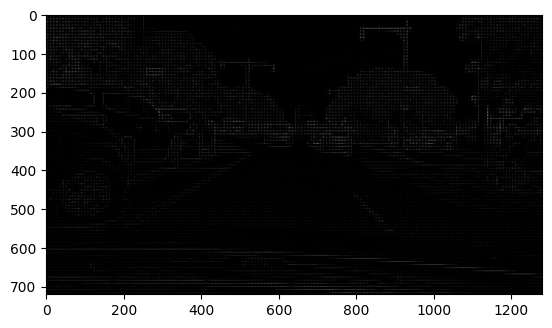

In [5]:
channel_axis = 2
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
transform_sqrt = True

def hog_histograms(
        image, 
        orientations, pixels_per_cell, cells_per_block, 
        transform_sqrt, channel_axis,
        visualize=False
):
    output = feature.hog(
        image, 
        orientations=orientations, 
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block, 
        transform_sqrt=transform_sqrt, 
        channel_axis=channel_axis,
        visualize=visualize
    )

    return output

hog_features, hog_image = hog_histograms(
    frame, 
    orientations, pixels_per_cell, cells_per_block, 
    transform_sqrt, channel_axis, 
    visualize=True
)

print(f"Frame shape: {frame.shape}")
print(f"HOG features shape: {hog_features.shape}")

plt.imshow(hog_image, cmap='gray')
plt.show()

# Spatial features

Frame shape: (720, 1280, 3)
Spatial features shape: (3072,)


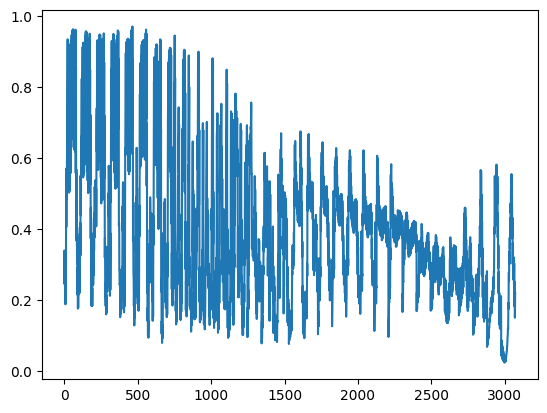

In [6]:
spatial_size = (32, 32)

def spatial_bin(image, size):

    features = transform.resize(image, size).ravel() 
    
    return features

spatial_features = spatial_bin(frame, spatial_size)

print((f"Frame shape: {frame.shape}"))
print(f"Spatial features shape: {spatial_features.shape}")

plt.plot(spatial_features)
plt.show()

# Color features

Frame shape: (720, 1280, 3)
Color features shape: (96,)


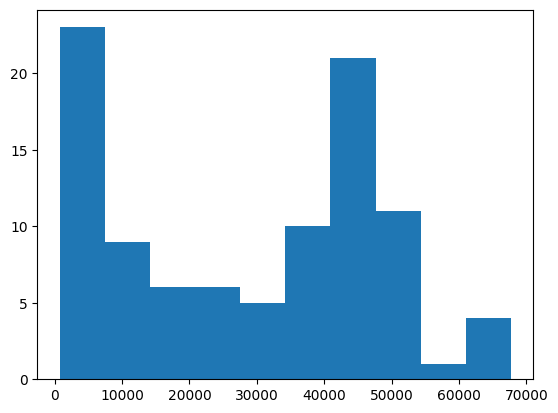

In [7]:
color_bins_n = 32
color_bins_range = (0, 256)

def color_hist(image, nbins, bins_range):

    r_hist, _ = np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    g_hist, _ = np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    b_hist, _ = np.histogram(image[:,:,2], bins=nbins, range=bins_range)

    hist_features = np.concatenate((r_hist, g_hist, b_hist))

    return hist_features

color_features = color_hist(frame, color_bins_n, color_bins_range)

print((f"Frame shape: {frame.shape}"))
print(f"Color features shape: {color_features.shape}")

plt.hist(color_features)
plt.show()